In [1]:
import os
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'
print(os.getenv('TF_GPU_ALLOCATOR'))

cuda_malloc_async


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
train=pd.read_csv('/home/trimax/Desktop/integrated-agriculture-platform/farm/datasets/warehouse/warehousing/train.csv')
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:
test=pd.read_csv('/home/trimax/Desktop/integrated-agriculture-platform/farm/datasets/warehouse/warehousing/test.csv')

In [5]:
meal_info=pd.read_csv('/home/trimax/Desktop/integrated-agriculture-platform/farm/datasets/warehouse/warehousing/meal_info.csv')

In [6]:
f_center=pd.read_csv('/home/trimax/Desktop/integrated-agriculture-platform/farm/datasets/warehouse/warehousing/fulfilment_center_info.csv')
f_center

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
...,...,...,...,...,...
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1


In [7]:
train=pd.merge(train,meal_info,left_on='meal_id',right_on='meal_id')
train=pd.merge(train,f_center,left_on='center_id',right_on='center_id')
test=pd.merge(test,meal_info,left_on='meal_id',right_on='meal_id')
test=pd.merge(test,f_center,left_on='center_id',right_on='center_id')

In [8]:
len(train)

456548

In [9]:
train.head(20)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0
5,1493612,6,55,1885,146.53,146.53,0,0,285,Beverages,Thai,647,56,TYPE_C,2.0
6,1110832,7,55,1885,145.53,146.53,0,0,148,Beverages,Thai,647,56,TYPE_C,2.0
7,1461167,8,55,1885,146.53,145.53,0,0,135,Beverages,Thai,647,56,TYPE_C,2.0
8,1102364,9,55,1885,134.83,134.83,0,0,175,Beverages,Thai,647,56,TYPE_C,2.0
9,1018130,10,55,1885,144.56,143.56,0,0,175,Beverages,Thai,647,56,TYPE_C,2.0


In [10]:
train_copy=train.copy()
train_copy.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [11]:
train.center_id.unique()

array([ 55,  24,  11,  83,  32,  13, 109,  52,  93, 186, 146,  57, 149,
        89, 124, 152,  97,  74, 108,  99,  66,  94,  91,  20,  34, 137,
        92, 126,  36, 162,  75, 177,  27, 157, 106,  64, 129,  14,  17,
       153, 139, 161,  81,  26,  73,  50, 104,  42, 113, 145,  53,  72,
        67, 174,  29,  77,  41,  30,  76,  59,  88, 143,  58,  10, 101,
        80,  43,  65,  39, 102, 110, 132,  23,  86,  68,  51,  61])

In [12]:
train.meal_id.unique()

array([1885, 1993, 2539, 2139, 2631, 1248, 1778, 1062, 2707, 1207, 1230,
       2322, 2290, 1727, 1109, 2640, 2306, 2126, 2826, 1754, 1971, 1902,
       1311, 1803, 1558, 2581, 1962, 1445, 2444, 2867, 1525, 2704, 2304,
       2577, 1878, 1216, 1247, 1770, 1198, 2760, 2492, 1543, 2664, 2569,
       2490, 1571, 2956, 1438, 2494, 1847, 2104])

In [13]:
train.groupby(by=['meal_id','center_id']).count()

id  week  checkout_price  base_price  \
meal_id center_id                                          
1062    10         145   145             145         145   
        11         145   145             145         145   
        13         145   145             145         145   
        14         145   145             145         145   
        17         145   145             145         145   
...                ...   ...             ...         ...   
2956    152          8     8               8           8   
        153         81    81              81          81   
        157         83    83              83          83   
        174         80    80              80          80   
        186         45    45              45          45   

                   emailer_for_promotion  homepage_featured  num_orders  \
meal_id center_id                                                         
1062    10                           145                145         145   
        11                           145                145         145   
        13                           145                145         145   
        14                           145                145         145   
        17                           145                145         145   
...                                  ...                ...         ...   
2956    152                            8                  8           8   
        153                           81                 81          81   
        157                           83                 83          83   
        174                           80                 80          80   
        186                           45                 45          45   

                   category  cuisine  city_code  region_code  center_type  \
meal_id center_id                                                           
1062    10              145      145        145          145          145   
        11              145      145        145          145          145   
        13              145      145        145          145          145   
        14              145      145        145          145          145   
        17              145      145        145          145          145   
...                     ...      ...        ...          ...          ...   
2956    152               8        8          8            8            8   
        153              81       81         81           81           81   
        157              83       83         83           83           83   
        174              80       80         80           80           80   
        186              45       45         45           45           45   

                   op_area  
meal_id center_id           
1062    10             145  
        11             145  
        13             145  
        14             145  
        17             145  
...                    ...  
2956    152              8  
        153             81  
        157             83  
        174             80  
        186             45  

[3597 rows x 13 columns]

In [14]:
train.describe(include='all')

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548,456548,456548.000000,456548.000000,456548,456548.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,4,NaN,NaN,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Beverages,Italian,NaN,NaN,TYPE_A,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127890,122925,NaN,NaN,262881,NaN
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,NaN,NaN,601.553399,56.614566,NaN,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,NaN,NaN,66.195914,17.641306,NaN,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,NaN,NaN,456.000000,23.000000,NaN,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,NaN,NaN,553.000000,34.000000,NaN,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,NaN,NaN,596.000000,56.000000,NaN,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,NaN,NaN,651.000000,77.000000,NaN,4.500000


In [15]:
train['diff']=train.base_price-train.checkout_price

In [16]:
train.head()
train.drop(columns=['id'],inplace=True)
train.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,diff
0,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0,15.46
1,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0,16.46
2,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0,1.00
3,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0,-1.00
4,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0,1.00


In [17]:
train.shape

(456548, 15)

In [18]:
train.set_index(['meal_id', 'center_id'],inplace=True)
train.head(100)

week  checkout_price  base_price  emailer_for_promotion  \
meal_id center_id                                                            
1885    55            1          136.83      152.29                      0   
        55            2          135.83      152.29                      0   
        55            3          132.92      133.92                      0   
        55            4          135.86      134.86                      0   
        55            5          146.50      147.50                      0   
...                 ...             ...         ...                    ...   
        55           96          136.83      135.83                      0   
        55           97          133.86      135.86                      0   
        55           98          120.28      134.86                      0   
        55           99          146.47      148.47                      0   
        55          100          144.53      146.53                      0   

                   homepage_featured  num_orders   category cuisine  \
meal_id center_id                                                     
1885    55                         0         177  Beverages    Thai   
        55                         0         323  Beverages    Thai   
        55                         0          96  Beverages    Thai   
        55                         0         163  Beverages    Thai   
        55                         0         215  Beverages    Thai   
...                              ...         ...        ...     ...   
        55                         0         271  Beverages    Thai   
        55                         0         203  Beverages    Thai   
        55                         0         134  Beverages    Thai   
        55                         0         109  Beverages    Thai   
        55                         0         163  Beverages    Thai   

                   city_code  region_code center_type  op_area   diff  
meal_id center_id                                                      
1885    55               647           56      TYPE_C      2.0  15.46  
        55               647           56      TYPE_C      2.0  16.46  
        55               647           56      TYPE_C      2.0   1.00  
        55               647           56      TYPE_C      2.0  -1.00  
        55               647           56      TYPE_C      2.0   1.00  
...                      ...          ...         ...      ...    ...  
        55               647           56      TYPE_C      2.0  -1.00  
        55               647           56      TYPE_C      2.0   2.00  
        55               647           56      TYPE_C      2.0  14.58  
        55               647           56      TYPE_C      2.0   2.00  
        55               647           56      TYPE_C      2.0   2.00  

[100 rows x 13 columns]

# no of workers needed in the warehouses

In [19]:
def no_category(num):
    if num < 136.0:
        return 'Low'
    elif num < 324.0:
        return 'Medium'
    elif num < 609.0:
        return 'High'
    else:
        return 'Very High'
    
train_copy['num_orders_category'] = train_copy['num_orders'].apply(no_category)
train_copy.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,num_orders_category
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0,Medium
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0,Medium
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0,Low
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0,Medium
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0,Medium


In [20]:
data =train_copy.groupby(['num_orders_category'])['num_orders'].sum().reset_index()

In [21]:
train.emailer_for_promotion, train.homepage_featured= train.emailer_for_promotion.astype(np.int8), train.homepage_featured.astype(np.int8)

In [22]:
train.checkout_price, train.checkout_price= train.checkout_price.astype(np.float32),train.checkout_price.astype(np.float32)

In [23]:
train.num_orders= train.num_orders.astype(np.int16)

# data splitting 

In [24]:
train.head()

week  checkout_price  base_price  emailer_for_promotion  \
meal_id center_id                                                            
1885    55            1      136.830002      152.29                      0   
        55            2      135.830002      152.29                      0   
        55            3      132.919998      133.92                      0   
        55            4      135.860001      134.86                      0   
        55            5      146.500000      147.50                      0   

                   homepage_featured  num_orders   category cuisine  \
meal_id center_id                                                     
1885    55                         0         177  Beverages    Thai   
        55                         0         323  Beverages    Thai   
        55                         0          96  Beverages    Thai   
        55                         0         163  Beverages    Thai   
        55                         0         215  Beverages    Thai   

                   city_code  region_code center_type  op_area   diff  
meal_id center_id                                                      
1885    55               647           56      TYPE_C      2.0  15.46  
        55               647           56      TYPE_C      2.0  16.46  
        55               647           56      TYPE_C      2.0   1.00  
        55               647           56      TYPE_C      2.0  -1.00  
        55               647           56      TYPE_C      2.0   1.00

In [25]:
train.drop(columns=['category', 'cuisine', 'city_code', 'region_code', 'center_type', 'op_area'], inplace=True)

In [26]:
train.loc[1885].index

Int64Index([55, 55, 55, 55, 55, 55, 55, 55, 55, 55,
            ...
            61, 61, 61, 61, 61, 61, 61, 61, 61, 61],
           dtype='int64', name='center_id', length=11092)

In [27]:
train.head()

week  checkout_price  base_price  emailer_for_promotion  \
meal_id center_id                                                            
1885    55            1      136.830002      152.29                      0   
        55            2      135.830002      152.29                      0   
        55            3      132.919998      133.92                      0   
        55            4      135.860001      134.86                      0   
        55            5      146.500000      147.50                      0   

                   homepage_featured  num_orders   diff  
meal_id center_id                                        
1885    55                         0         177  15.46  
        55                         0         323  16.46  
        55                         0          96   1.00  
        55                         0         163  -1.00  
        55                         0         215   1.00

for i in meal_info.meal_id.unique():
    for j in train.loc[i].index.unique():
        temp=train.loc[i,j]
        filename=f'{j}_{i}.csv'
        temp.to_csv(filename)

In [28]:
train.num_orders.dtype

dtype('int16')

In [29]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import joblib
from keras.layers import LSTM, Dropout, Dense
from keras import Sequential
from math import sqrt
from matplotlib import pyplot
import tensorflow as tf
import keras.backend as K

2022-11-08 01:22:10.903299: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-08 01:22:11.373133: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-08 01:22:12.280907: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-08 01:22:12.281079: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [32]:
filename='/home/trimax/Desktop/integrated-agriculture-platform/farm/datasets/warehouse/61_1445.csv'

In [33]:
#reading the splitted datasets 
df= pd.read_csv(filename)

In [34]:
df.drop(columns=['meal_id','center_id'], inplace=True)
df.set_index(['week'],inplace=True)
df[['checkout_price', 'base_price', 'diff']]/=100

In [35]:
df.tail(15)

,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,diff
week,,,,,,
125,7.2753,7.2853,0,0,55,0.0100
126,7.2853,7.2853,0,1,42,0.0000
127,7.2753,7.2853,0,1,55,0.0100
128,7.6633,7.2853,0,1,54,-0.3780
129,7.6533,7.2653,0,1,42,-0.3880
133,4.8403,7.6533,1,1,202,2.8130
134,4.8603,7.6633,1,0,96,2.8030
135,6.2668,7.6533,0,0,27,1.3865
136,7.6633,7.6733,0,0,82,0.0100


In [36]:
df.describe(include='all')

,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,diff
count,125.000000,125.000000,125.00000,125.00000,125.00000,125.000000
mean,6.149566,6.797735,0.20000,0.20000,69.16800,0.648169
std,0.995624,0.407092,0.40161,0.40161,71.05935,0.996360
min,3.890300,5.713300,0.00000,0.00000,13.00000,-0.505000
25%,5.325300,6.450500,0.00000,0.00000,26.00000,0.000000
50%,6.315300,6.606300,0.00000,0.00000,42.00000,0.010000
75%,7.071300,7.081300,0.00000,0.00000,80.00000,1.339200
max,7.673300,7.673300,1.00000,1.00000,323.00000,2.929400


In [37]:
X= df.drop(columns=['num_orders']).values
Y= df.num_orders.values
X.reshape(-1,5)
Y.reshape(-1)

array([ 96,  28,  80,  54, 202, 189,  55,  41, 270, 312, 271,  15,  26,
        15,  28,  28,  27,  40,  14,  40,  15,  13,  54,  69,  41,  53,
        27,  15,  15,  26,  42, 123,  94,  26,  13,  28, 123, 108,  26,
        67,  95,  14,  28,  54,  94,  68, 323, 202,  80,  14,  13,  14,
        28,  14,  53,  15,  14,  96,  68,  41,  13, 217, 136,  53,  95,
        42,  41,  40,  14,  27,  26,  54,  67,  40,  13,  15,  13,  41,
        54, 135,  28,  26, 216, 148,  54,  42,  14,  26, 244, 257,  13,
        26,  13,  27, 243,  42,  27,  94, 162,  69,  15,  27,  41,  15,
        54,  13,  14, 190, 217,  53,  55,  42,  55,  54,  42, 202,  96,
        27,  82,  53,  27,  26,  80,  68,  54])

Multivariate LSTM

In [38]:
input_data= df.drop(columns=['num_orders']).values

In [39]:
lookback= 3

test_size=int(.1 * len(df))
x=[]
y=[]
for i in range(len(df)-lookback):
    t=[]
    for j in range(0,lookback):
        
        t.append(input_data[[(i+j)], :])
    x.append(t)
    y.append(df.loc[:,'checkout_price':].values[i+ lookback,4])

In [40]:
x, y= np.array(x), np.array(y)
test_size= -1*(test_size+lookback)
x_test = x[test_size:]
y_test=y[test_size:]
y_train= y[:test_size]
x_train= x[:test_size]
x = x.reshape(x.shape[0],lookback, -1)
x_train = x_train.reshape(x_train.shape[0],lookback, -1)
x_test = x_test.reshape(x_test.shape[0],lookback, -1)
print(x.shape)
print(x_test.shape)
print(x_train.shape)

(122, 3, 5)
(15, 3, 5)
(107, 3, 5)


In [41]:
model = Sequential()
model.add(LSTM(units=5, return_sequences= True, input_shape=(x.shape[1],5)))
model.add(LSTM(units=10))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=5, activation='relu'))
model.add(Dense(units=1))
model.summary()

2022-11-08 01:22:39.449505: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 01:22:39.616403: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 01:22:39.616955: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 01:22:39.617951: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 5)              220       
                                                                 
 lstm_1 (LSTM)               (None, 10)                640       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 10)                110       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6

In [42]:
model.compile(optimizer='adam', loss='mse')

In [43]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100


2022-11-08 01:22:45.496891: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8600


4/4 [==============================] - 4s 6ms/step - loss: 10453.0586
Epoch 2/100
4/4 [==============================] - 0s 7ms/step - loss: 10445.0996
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 10440.1631
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 10436.1250
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 10435.5234
Epoch 6/100
4/4 [==============================] - 0s 7ms/step - loss: 10426.9189
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 10426.6621
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 10418.7627
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 10405.5752
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 10407.1650
Epoch 11/100
4/4 [==============================] - 0s 7ms/step - loss: 10409.5820
Epoch 12/100
4/4 [==============================] - 0s 6ms/step - loss: 10390.5518
Epoch 13/100
4/4 [=======

In [44]:
predicted_value= model.predict(x)
print(predicted_value.shape)
#print("training mse "+str(mse(y_train, model.predict(x_train))))
print("training mae "+str(mae(y_train, model.predict(x_train))))
#print("test mse "+str(mse(y_test, model.predict(x_test))))
print("test mae "+str(mae(y_test, model.predict(x_test))))

4/4 [==============================] - 1s 3ms/step
(122, 1)
4/4 [==============================] - 0s 3ms/step
training mae 49.93579565030392
1/1 [==============================] - 0s 17ms/step
test mae 24.513682810465493


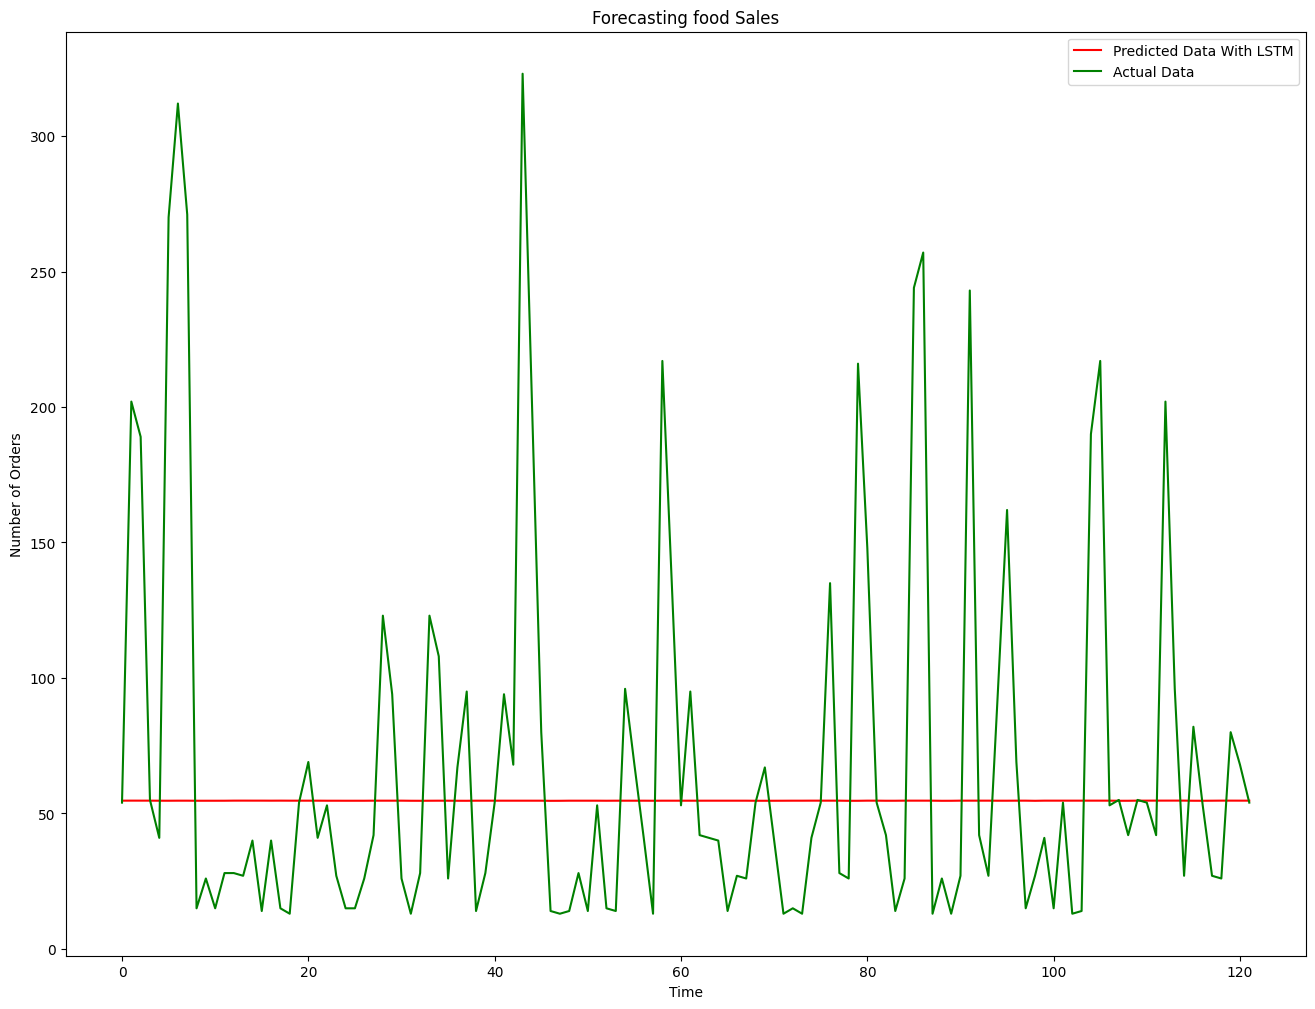

In [45]:
pyplot.figure(figsize=(16, 12))
pyplot.plot(predicted_value, color= 'red', label='Predicted Data With LSTM')
pyplot.plot(y, color='green', label='Actual Data')
pyplot.title("Forecasting food Sales")
pyplot.xlabel("Time")
pyplot.ylabel("Number of Orders")
pyplot.legend()
pyplot.show()

In [46]:
X_train, X_val, y_train, y_val= train_test_split( X, Y, test_size=0.15, random_state=101)

RF

In [47]:
pipe1= Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=True)),
                 ('ext', RandomForestRegressor( random_state=101, max_depth=6, min_impurity_decrease=0.5))])

In [48]:
t=pipe1.fit(X_train, y_train )
pred1= pipe1.predict(X_val)
print(mae(y_train, pipe1.predict(X_train)))
mae(y_val, pred1)

15.321129469639851


23.20371025915813

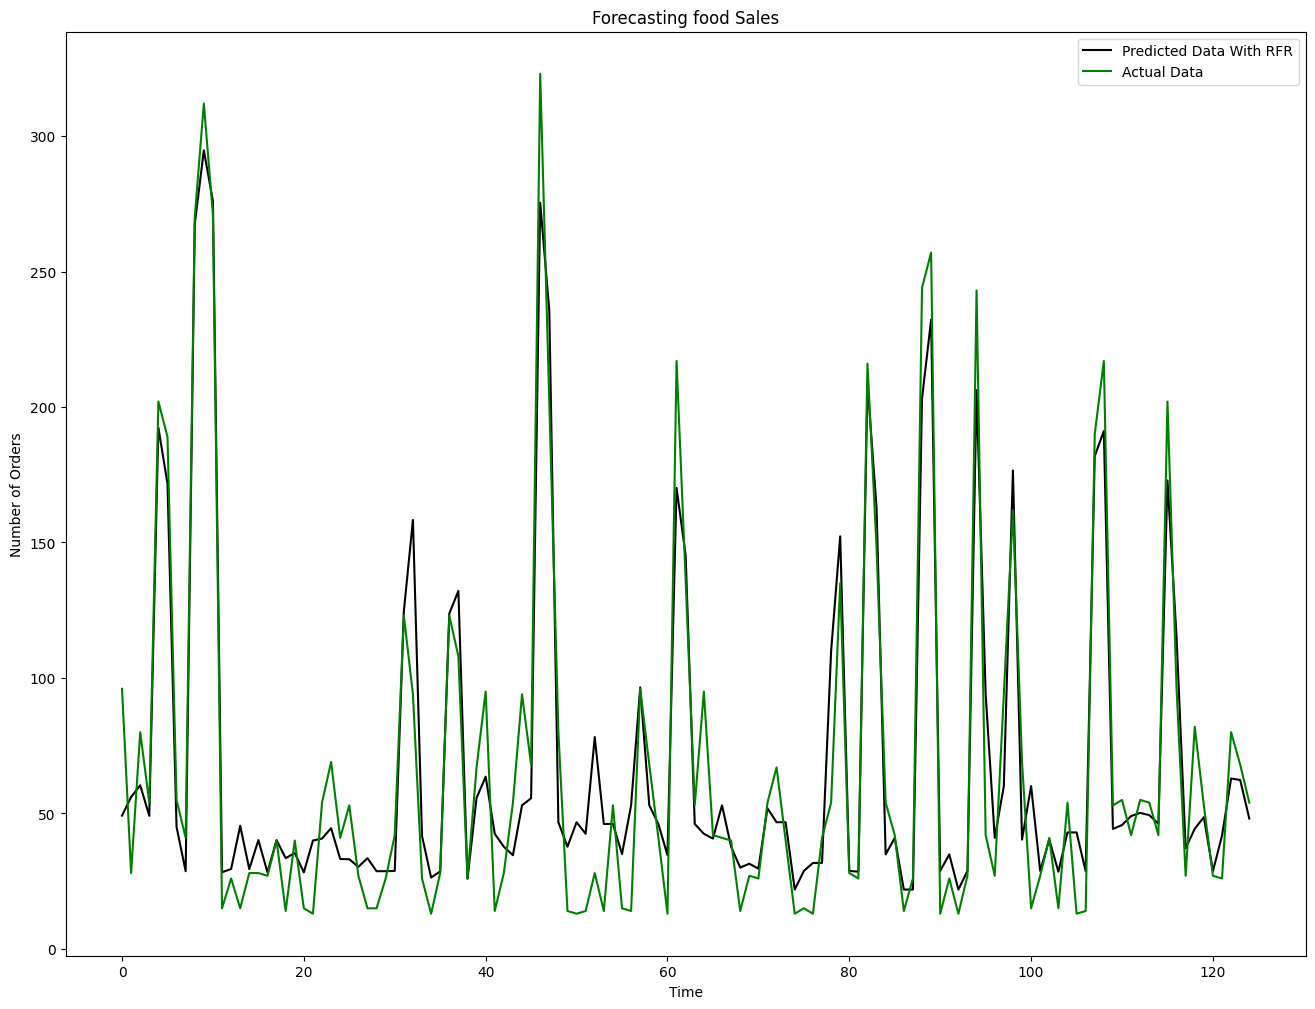

In [49]:
pyplot.figure(figsize=(16, 12))
pyplot.plot(pipe1.predict(X), color= 'black', label='Predicted Data With RFR')
pyplot.plot(Y, color='green', label='Actual Data')
pyplot.title("Forecasting food Sales")
pyplot.xlabel("Time")
pyplot.ylabel("Number of Orders")
pyplot.legend()
pyplot.show()

bayesian ridge

In [50]:
pipe2= Pipeline([('poly', PolynomialFeatures(degree=6, include_bias=True)),
                 ('lin', BayesianRidge(tol= 1e-8, n_iter=300, normalize=True))])

In [51]:
t=pipe2.fit(X_train, y_train)
pred2= pipe2.predict(X_val)
print(mae(y_train, pipe2.predict(X_train)))
mae(y_val, pred2)

/home/trimax/.local/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), BayesianRidge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


26.913594083610246


20.422699860572788

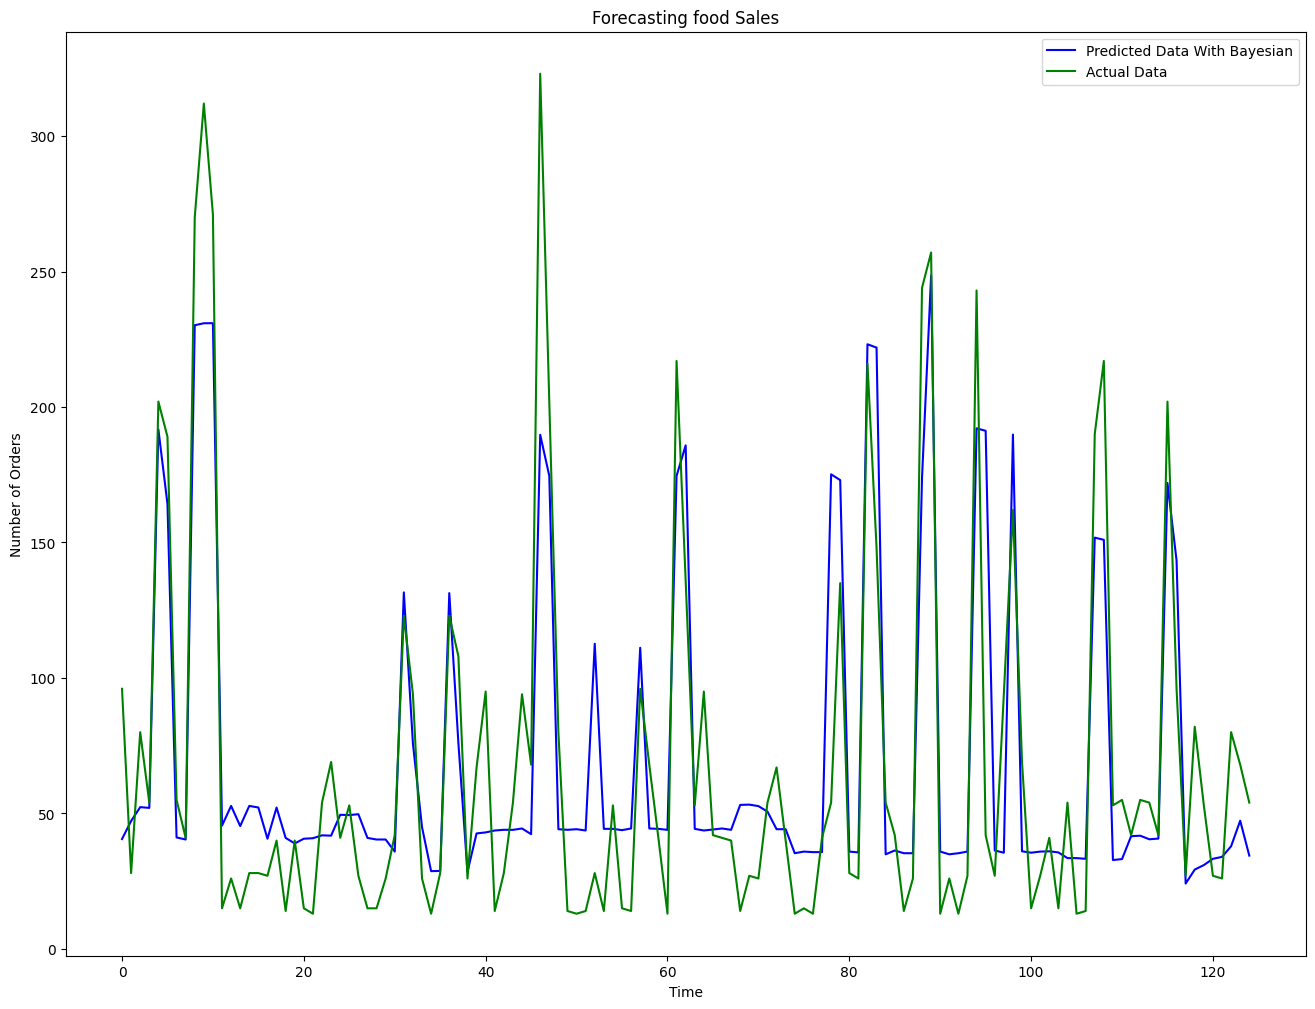

In [52]:
pyplot.figure(figsize=(16, 12))
pyplot.plot(pipe2.predict(X), color= 'blue', label='Predicted Data With Bayesian')
pyplot.plot(Y, color='green', label='Actual Data')
pyplot.title("Forecasting food Sales")
pyplot.xlabel("Time")
pyplot.ylabel("Number of Orders")
pyplot.legend()
pyplot.show()

knn

In [53]:
pipe3= Pipeline([('poly', PolynomialFeatures(degree=1, include_bias=True)),
                 ('KNN', KNeighborsRegressor(n_neighbors=100, weights='distance' ))])

In [54]:
t=pipe3.fit(X_train, y_train)
pred3= pipe3.predict(X_val)
print(mae(y_train, pipe3.predict(X_train)))
mae(y_val, pred3)

5.0534626993056815


24.275633704823488

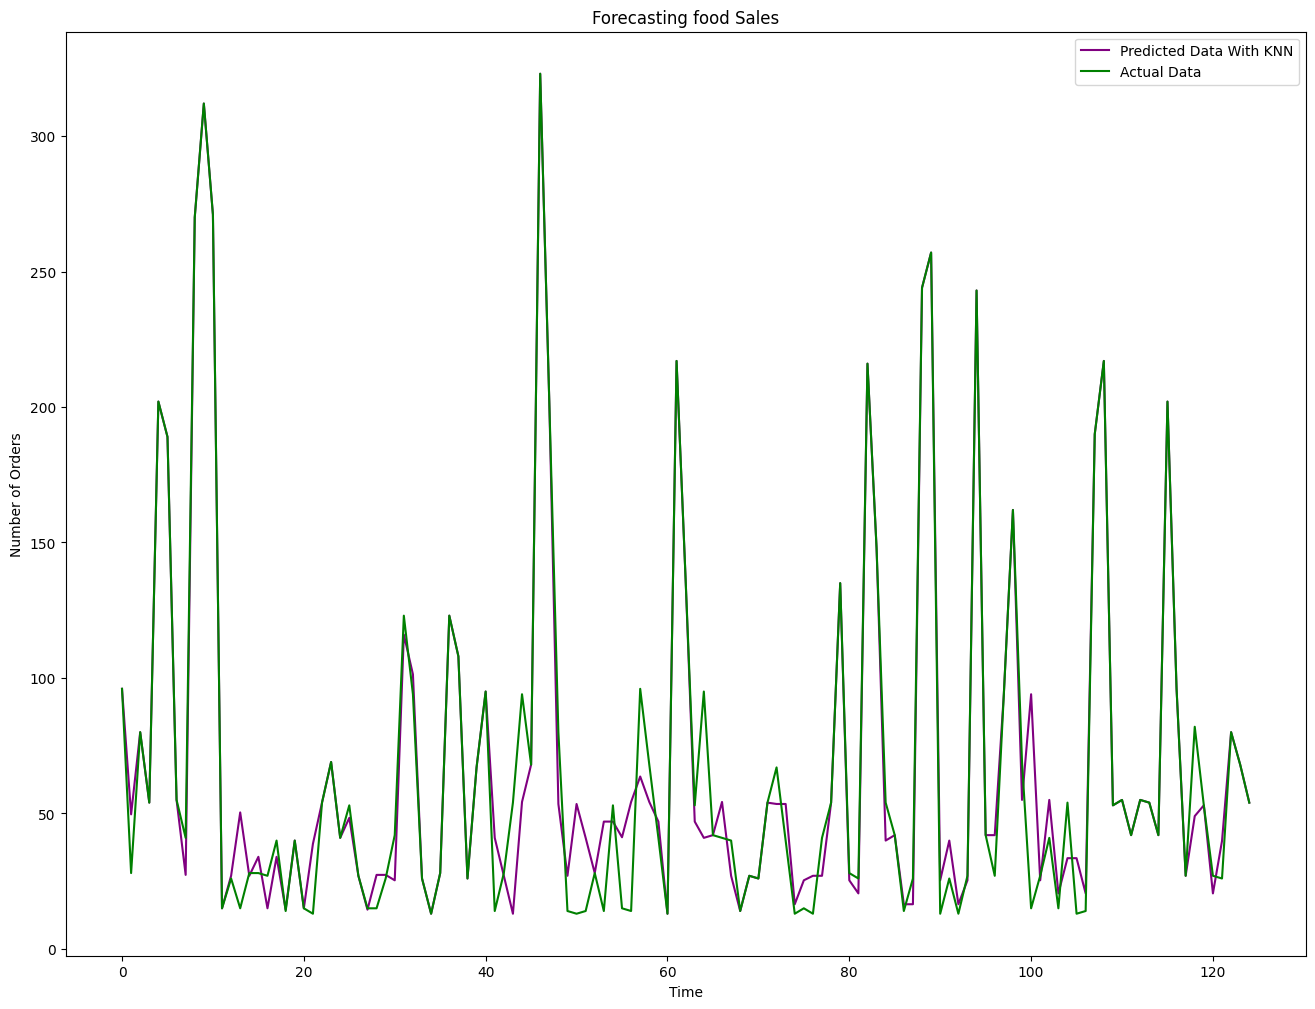

In [55]:
pyplot.figure(figsize=(16, 12))
pyplot.plot(pipe3.predict(X), color= 'purple', label='Predicted Data With KNN')
pyplot.plot(Y, color='green', label='Actual Data')
pyplot.title("Forecasting food Sales")
pyplot.xlabel("Time")
pyplot.ylabel("Number of Orders")
pyplot.legend()
pyplot.show()

huber regression

In [56]:
pipe4= Pipeline([('poly', PolynomialFeatures(degree=3, include_bias=True)),
                 ('Hubber', HuberRegressor(epsilon=5.0, max_iter=800  ))])

In [57]:
t=pipe4.fit(X_train, y_train)
pred4= pipe4.predict(X_val)
print(mae(y_train, pipe4.predict(X_train)))
mae(y_val, pred4)

26.752065671663782


/home/trimax/.local/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:335: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


23.29925836746371

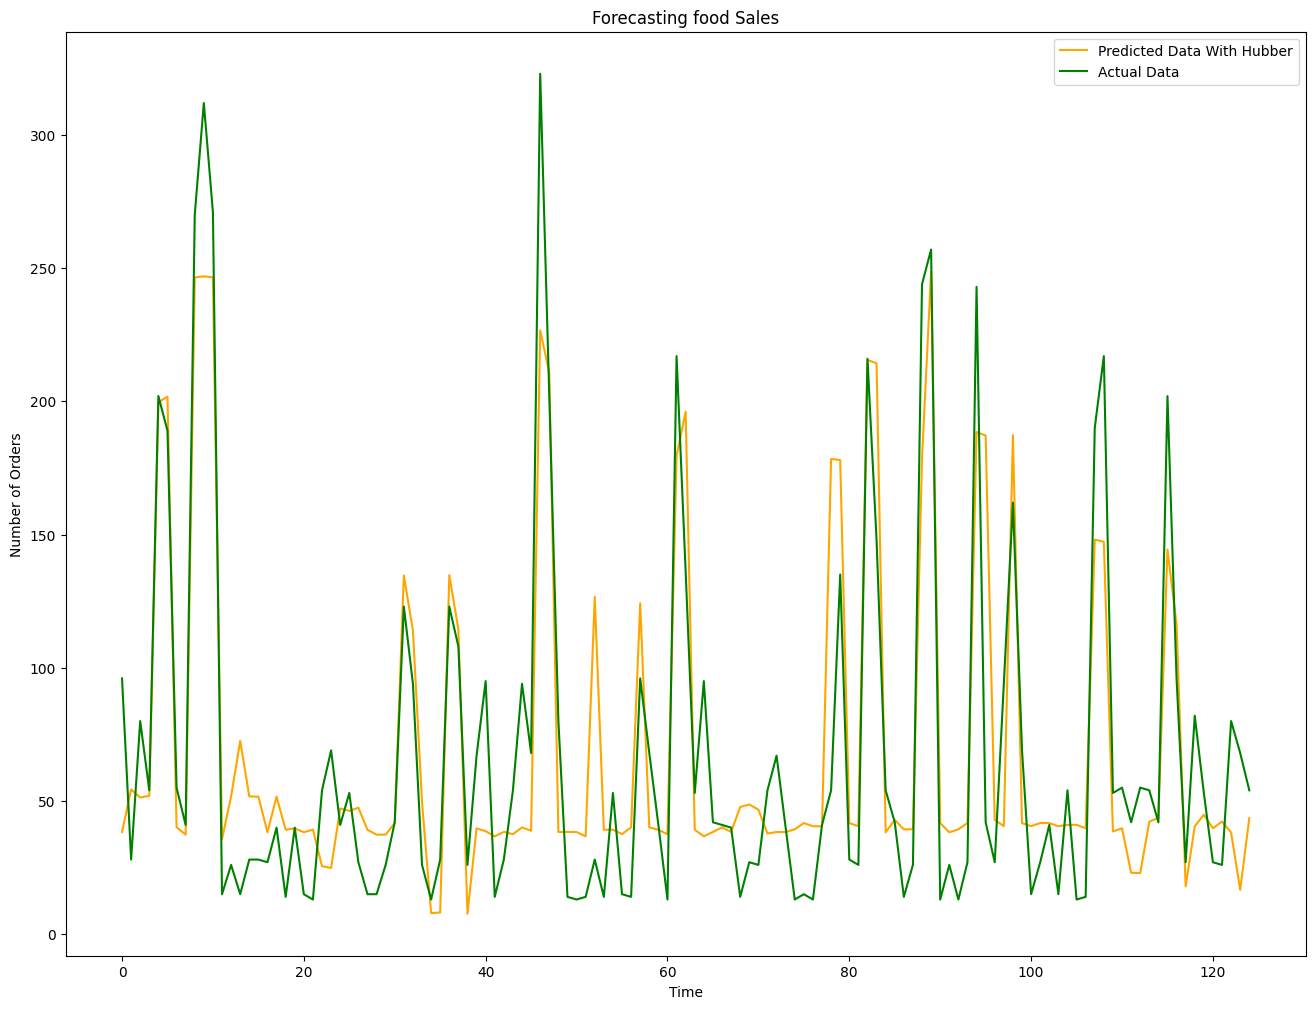

In [58]:
pyplot.figure(figsize=(16, 12))
pyplot.plot(pipe4.predict(X), color= 'orange', label='Predicted Data With Hubber')
pyplot.plot(Y, color='green', label='Actual Data')
pyplot.title("Forecasting food Sales")
pyplot.xlabel("Time")
pyplot.ylabel("Number of Orders")
pyplot.legend()
pyplot.show()

In [59]:
LSTm=[]
for i in range(lookback):
    LSTm.append(df['num_orders'].values[i])
for j in (predicted_value):
    LSTm.append(float(j))

len(LSTm)

125

In [60]:
df['RFR']= pipe1.predict(X)
df['BR']=pipe2.predict(X)
df['KNN']=pipe3.predict(X)
df['HR']=pipe4.predict(X)
df['LSTm']= LSTm

overall results of all algos

In [61]:
df.head()

,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,diff,RFR,BR,KNN,HR,LSTm
week,,,,,,,,,,,
1,6.5963,6.6063,0,0,96,0.0100,49.206053,40.567116,96.000000,38.287531,96.000000
2,6.8288,6.6063,0,1,28,-0.2225,56.057876,47.199278,49.675836,54.345090,28.000000
3,6.6063,6.6063,0,1,80,0.0000,60.390927,52.334466,80.000000,51.279419,80.000000
4,6.6063,6.5863,0,1,54,-0.0200,49.130372,52.053433,54.000000,51.934083,54.720161
5,4.8403,6.5863,1,1,202,1.7460,192.411821,191.733969,202.000000,199.648786,54.734871


In [62]:
df.corr()

,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,diff,RFR,BR,KNN,HR,LSTm
checkout_price,1.000000,0.202630,-0.766022,-0.203591,-0.713826,-0.916470,-0.787945,-0.838945,-0.710896,-0.809016,0.018924
base_price,0.202630,1.000000,0.125266,0.030095,0.055095,0.206098,0.060040,0.039976,0.054795,0.047338,-0.029623
emailer_for_promotion,-0.766022,0.125266,1.000000,0.300000,0.732128,0.816637,0.799829,0.865658,0.728854,0.833327,-0.031616
homepage_featured,-0.203591,0.030095,0.300000,1.000000,0.414782,0.215736,0.431409,0.501082,0.432475,0.484615,-0.037555
num_orders,-0.713826,0.055095,0.732128,0.414782,1.000000,0.735809,0.952913,0.865843,0.976488,0.868591,0.057423
diff,-0.916470,0.206098,0.816637,0.215736,0.735809,1.000000,0.811894,0.854658,0.732759,0.827760,-0.031014
RFR,-0.787945,0.060040,0.799829,0.431409,0.952913,0.811894,1.000000,0.933117,0.967960,0.945337,-0.018330
BR,-0.838945,0.039976,0.865658,0.501082,0.865843,0.854658,0.933117,1.000000,0.871917,0.983412,-0.028595
KNN,-0.710896,0.054795,0.728854,0.432475,0.976488,0.732759,0.967960,0.871917,1.000000,0.877304,0.044067
HR,-0.809016,0.047338,0.833327,0.484615,0.868591,0.827760,0.945337,0.983412,0.877304,1.000000,-0.035632


combiantions of ensebmles

In [63]:
input_data= df.drop(columns=['num_orders','RFR', 'BR', 'HR', 'LSTm']).values
lookback= 2

test_size=int(.1 * len(df))
x=[]
y=[]
for i in range(len(df)-lookback):
    t=[]
    for j in range(0,lookback):
        
        t.append(input_data[[(i+j)], :])
    x.append(t)
    y.append(df.loc[:,'checkout_price':].values[i+ lookback,4])

In [64]:
X= df.drop(columns=['num_orders','KNN', 'BR', 'HR', 'LSTm']).values
Y= df.num_orders.values
X.reshape(-1,5)
Y.reshape(-1)

array([ 96,  28,  80,  54, 202, 189,  55,  41, 270, 312, 271,  15,  26,
        15,  28,  28,  27,  40,  14,  40,  15,  13,  54,  69,  41,  53,
        27,  15,  15,  26,  42, 123,  94,  26,  13,  28, 123, 108,  26,
        67,  95,  14,  28,  54,  94,  68, 323, 202,  80,  14,  13,  14,
        28,  14,  53,  15,  14,  96,  68,  41,  13, 217, 136,  53,  95,
        42,  41,  40,  14,  27,  26,  54,  67,  40,  13,  15,  13,  41,
        54, 135,  28,  26, 216, 148,  54,  42,  14,  26, 244, 257,  13,
        26,  13,  27, 243,  42,  27,  94, 162,  69,  15,  27,  41,  15,
        54,  13,  14, 190, 217,  53,  55,  42,  55,  54,  42, 202,  96,
        27,  82,  53,  27,  26,  80,  68,  54])

In [65]:
x, y= np.array(x), np.array(y)
test_size= -1*(test_size+lookback)
x_test = x[test_size:]
y_test=y[test_size:]
y_train= y[:test_size]
x_train= x[:test_size]
x = x.reshape(x.shape[0],lookback, -1)
x_train = x_train.reshape(x_train.shape[0],lookback, -1)
x_test = x_test.reshape(x_test.shape[0],lookback, -1)
print(x.shape)
print(x_test.shape)
print(x_train.shape)

(123, 2, 6)
(14, 2, 6)
(109, 2, 6)


In [66]:
model = Sequential()
model.add(LSTM(units=5, return_sequences= True, input_shape=(x.shape[1],6)))
model.add(LSTM(units=10))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=5, activation='relu'))
model.add(Dense(units=1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 2, 5)              240       
                                                                 
 lstm_3 (LSTM)               (None, 10)                640       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dropout_3 (Dropout)         (None, 10)                0         
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 1)                

In [67]:
X_train, X_val, y_train, y_val= train_test_split( X, Y, test_size=0.15, random_state=101)
pipe6=  Pipeline([('poly', PolynomialFeatures(degree=3, include_bias=True)),('Hubber', HuberRegressor(epsilon=5.0, max_iter=800  ))])
t=pipe6.fit(X_train, y_train)
pred6= pipe6.predict(X_val)
print(mae(y_train, pipe6.predict(X_train)))
mae(y_val, pred6)

12.756436229804411


28.05943070335974

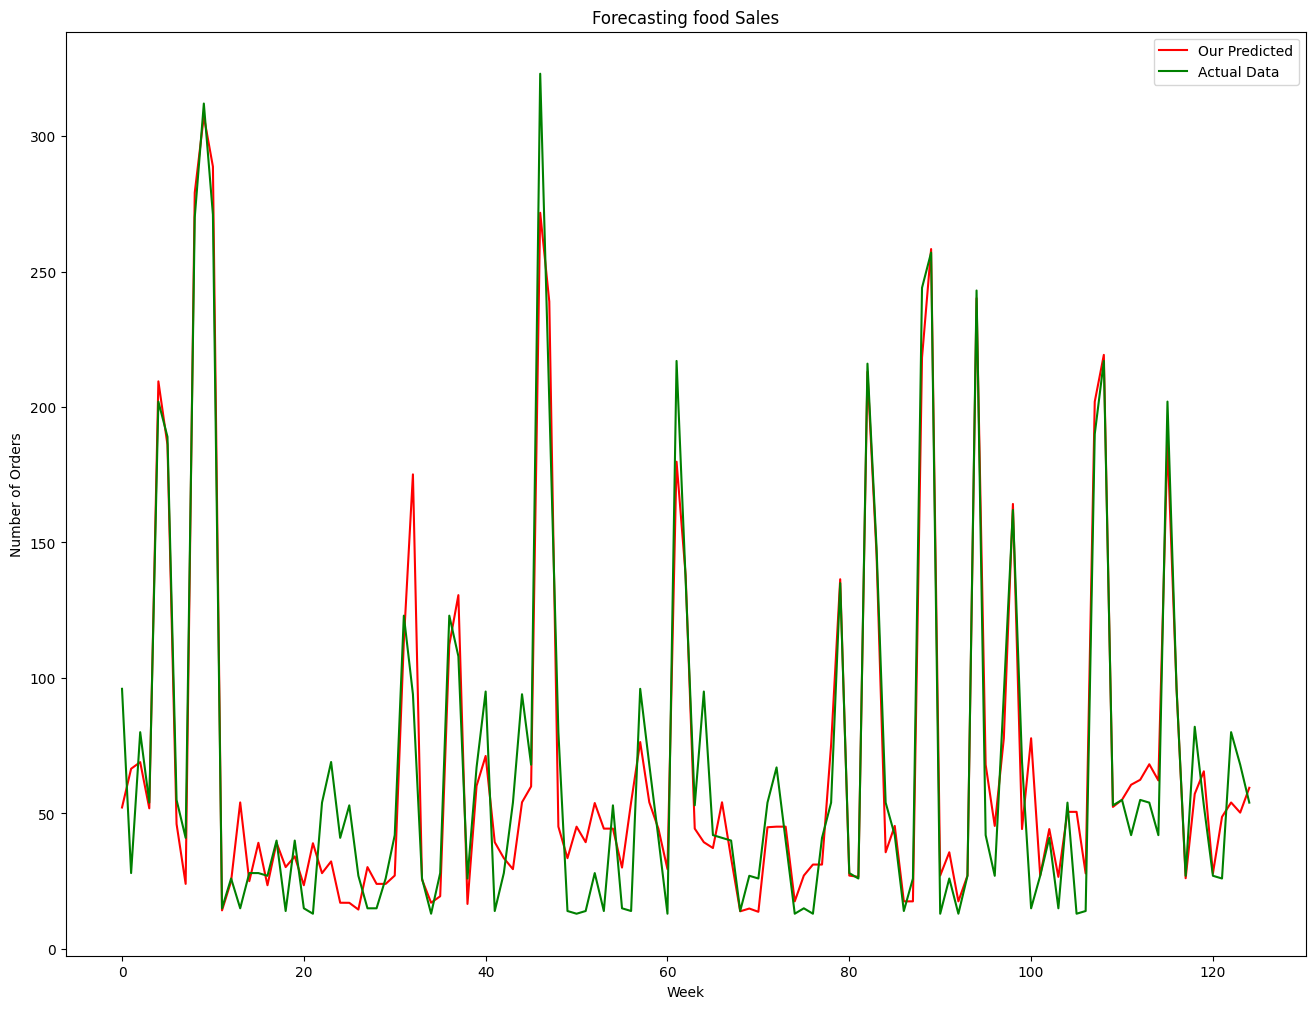

In [68]:
pyplot.figure(figsize=(16, 12))
pyplot.plot(pipe6.predict(X), color= 'Red', label='Our Predicted')
pyplot.plot(Y, color='green', label='Actual Data')
pyplot.title("Forecasting food Sales")
pyplot.xlabel("Week")
pyplot.ylabel("Number of Orders")
pyplot.legend()
pyplot.show()

In [69]:
df['y1']= pipe6.predict(X)

In [70]:
df.head()

,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,diff,RFR,BR,KNN,HR,LSTm,y1
week,,,,,,,,,,,,
1,6.5963,6.6063,0,0,96,0.0100,49.206053,40.567116,96.000000,38.287531,96.000000,52.207142
2,6.8288,6.6063,0,1,28,-0.2225,56.057876,47.199278,49.675836,54.345090,28.000000,66.502436
3,6.6063,6.6063,0,1,80,0.0000,60.390927,52.334466,80.000000,51.279419,80.000000,68.940855
4,6.6063,6.5863,0,1,54,-0.0200,49.130372,52.053433,54.000000,51.934083,54.720161,51.898864
5,4.8403,6.5863,1,1,202,1.7460,192.411821,191.733969,202.000000,199.648786,54.734871,209.469445


In [71]:
X= df.drop(columns=['num_orders','KNN', 'BR', 'HR', 'LSTm']).values
Y= df.num_orders.values
X.reshape(-1,7)
Y.reshape(-1)

array([ 96,  28,  80,  54, 202, 189,  55,  41, 270, 312, 271,  15,  26,
        15,  28,  28,  27,  40,  14,  40,  15,  13,  54,  69,  41,  53,
        27,  15,  15,  26,  42, 123,  94,  26,  13,  28, 123, 108,  26,
        67,  95,  14,  28,  54,  94,  68, 323, 202,  80,  14,  13,  14,
        28,  14,  53,  15,  14,  96,  68,  41,  13, 217, 136,  53,  95,
        42,  41,  40,  14,  27,  26,  54,  67,  40,  13,  15,  13,  41,
        54, 135,  28,  26, 216, 148,  54,  42,  14,  26, 244, 257,  13,
        26,  13,  27, 243,  42,  27,  94, 162,  69,  15,  27,  41,  15,
        54,  13,  14, 190, 217,  53,  55,  42,  55,  54,  42, 202,  96,
        27,  82,  53,  27,  26,  80,  68,  54])

In [72]:
model= Sequential()
model.add(Dense(units=7, activation='relu', input_shape=(7,)))
model.add(Dropout(0.1))
model.add(Dense(units=14, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(units=7, activation='relu'))
model.add(Dense(units=1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 7)                 56        
                                                                 
 dropout_4 (Dropout)         (None, 7)                 0         
                                                                 
 dense_7 (Dense)             (None, 14)                112       
                                                                 
 dropout_5 (Dropout)         (None, 14)                0         
                                                                 
 dense_8 (Dense)             (None, 7)                 105       
                                                                 
 dense_9 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281
Trainable params: 281
Non-trainable 

In [73]:
model.compile(optimizer='adam', loss='mse')

In [74]:
X_train, X_val, y_train, y_val= train_test_split( X, Y, test_size=0.15, random_state=101)

In [75]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 18611.8496
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 16792.8770
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 16781.3906
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 16566.0195
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 14998.2178
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 13623.0986
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 13084.7832
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 13222.3994
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 11479.0557
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 11927.8818
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 10098.0391
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 9466.7637
Epoch 13/100
4

4/4 [==============================] - 0s 1ms/step


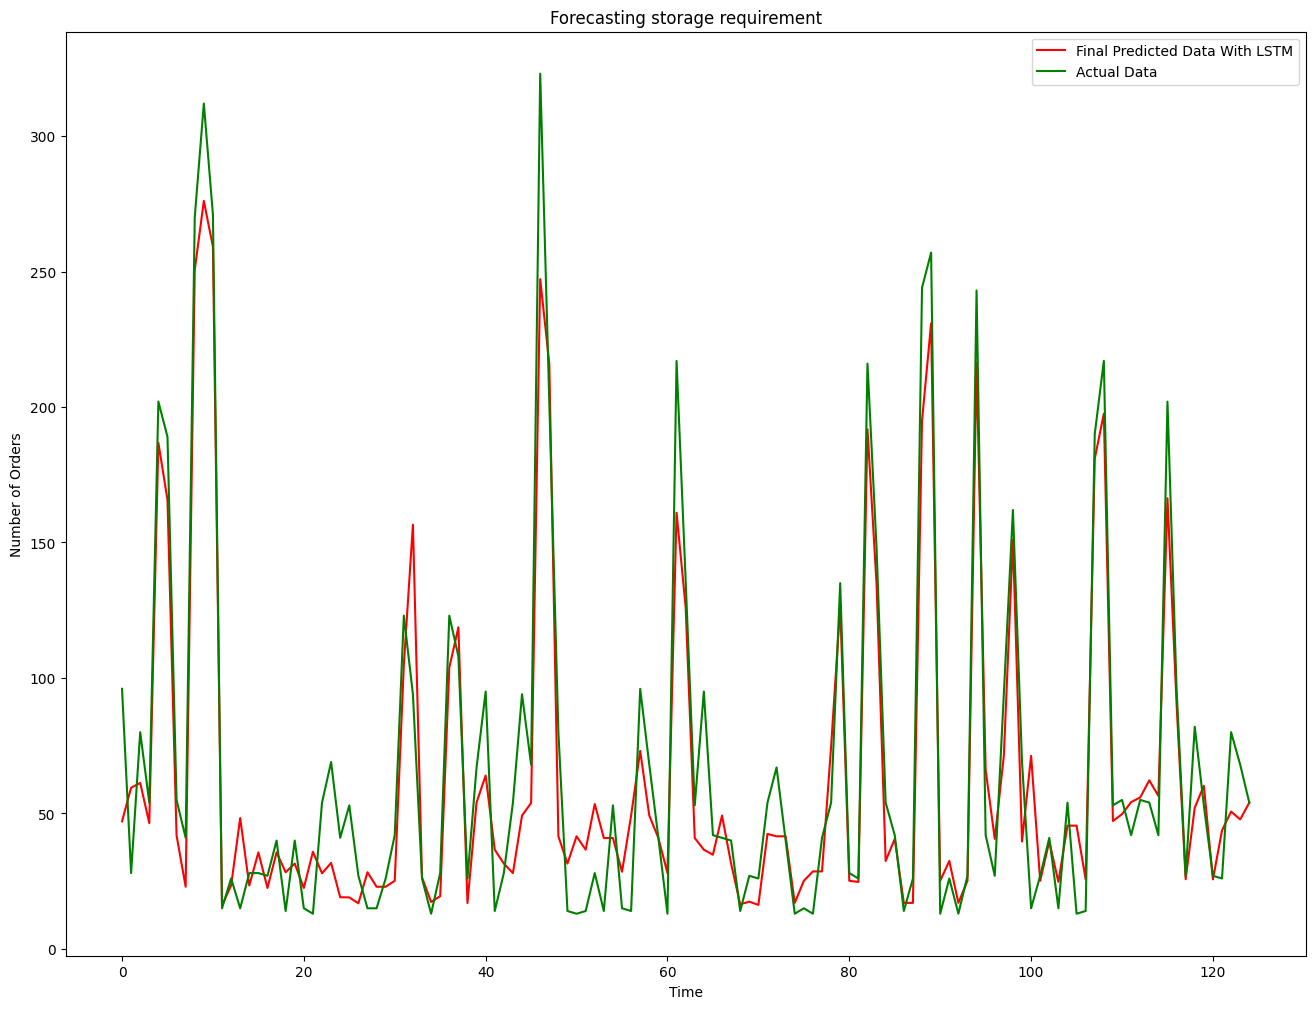

In [76]:
pyplot.figure(figsize=(16, 12))
pyplot.plot(model.predict(X), color= 'red', label='Final Predicted Data With LSTM')
pyplot.plot(Y, color='green', label='Actual Data')
pyplot.title("Forecasting storage requirement")
pyplot.xlabel("Time")
pyplot.ylabel("Number of Orders")
pyplot.legend()

pyplot.show()

In [77]:
print(mae(y_val, model.predict(X_val)))
mae(y_train, model.predict(X_train))

1/1 [==============================] - 0s 26ms/step
26.118514010780736
4/4 [==============================] - 0s 2ms/step


15.32766653456778

In [81]:
model.save('warehousing.h5')

In [79]:
model1= Sequential()
model1.add(Dense(units=7, activation='relu', input_shape=(7,)))
model1.add(Dropout(0.1))
model1.add(Dense(units=14, activation='relu'))
model1.add(Dropout(0.15))
model1.add(Dense(units=7, activation='relu'))
model1.add(Dense(units=1))
model1.load_weights('model_save2.h5')

In [80]:
mae(y_val, model1.predict(X_val))

1/1 [==============================] - 0s 41ms/step


26.118514010780736